# Diabetes Multiple Linear Regression

This notebook aims to predict a person's regression in the condition with respect to various attributes about them 
### 1. Load the data

In [47]:
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("diabetes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [48]:
from sklearn.linear_model import LinearRegression

# Feature matrix and target vector
X = data.drop('Progression', axis=1)  
y = data['Progression']


### 3. Trainig and testing samples

In [49]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=True,  random_state=42
)

print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (353, 10) (353,)
Test data: (89, 10) (89,)


### 4. Feature Scaling

<Axes: >

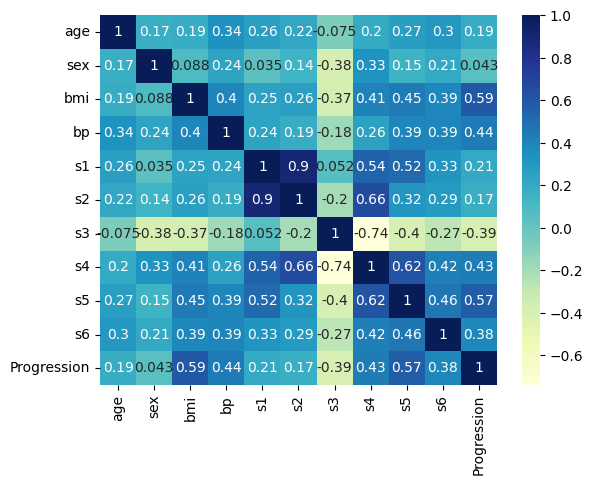

In [50]:
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

In [51]:
# Plot the distribution of the data, drop the correlated one
X = X.drop(columns=["s1", "s2"])


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler onn the train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### 5. Fit in the model

In [53]:
import numpy as np

# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(
        np.min(X_test[:, i]), np.max(X_test[:, i]), num=X_test.shape[0]
    )
y_line = lm.predict(X_line)

print("Intercept: \n", lm.intercept_)
print("Coefficients: \n", lm.coef_)

Intercept: 
 -25.13322785293593
Coefficients: 
 [   8.2612689   -23.06446772  135.63561351   84.9935688  -244.80178532
  162.87932677   46.32729542   72.03113268  191.18672297   13.3055384 ]


### 6. Predictions and OUtcome Conversion

In [54]:
# Predictions
predictions[0:10]

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858])

### 7. R squared score

In [55]:
from sklearn.metrics import  r2_score


r2 = r2_score(y_test, predictions)

print(f'R-squared: {r2}')

R-squared: 0.4526027629719187


This score is not close to 1, which suggests that our model does not fits our observations well.